In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation,Conv2D,MaxPool2D
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.utils import to_categorical
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import glob,cv2,os
import itertools
import keras
import itertools
%matplotlib inline

In [2]:
VGG_model = keras.applications.VGG16(weights='imagenet', include_top=False,input_shape=(224, 224, 3))
print('VGG16',len(VGG_model.layers))

VGG16 19


(6000, 96, 96, 3) (6000, 4)


C:\Users\USER\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


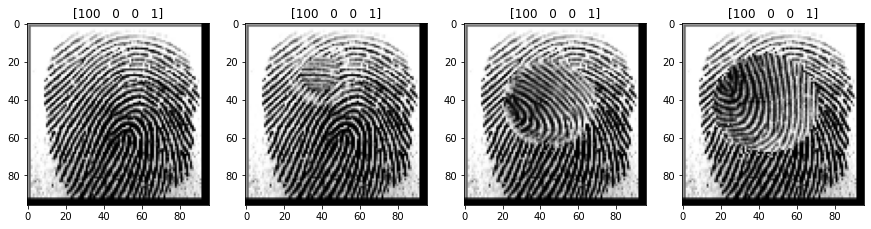

In [3]:
x_real = np.load('dataset_c/x_real.npz')['data']
y_real = np.load('dataset_c/y_real.npy')
x_easy = np.load('dataset_c/x_easy.npz')['data']
y_easy = np.load('dataset_c/y_easy.npy')
x_medium = np.load('dataset_c/x_medium.npz')['data']
y_medium = np.load('dataset_c/y_medium.npy')
x_hard = np.load('dataset_c/x_hard.npz')['data']
y_hard = np.load('dataset_c/y_hard.npy')

print(x_real.shape, y_real.shape)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.title(y_real[0])
plt.imshow(x_real[0].squeeze()) # cmap='gray'
plt.subplot(1, 4, 2)
plt.title(y_easy[0])
plt.imshow(x_easy[0].squeeze())
plt.subplot(1, 4, 3)
plt.title(y_medium[0])
plt.imshow(x_medium[0].squeeze())
plt.subplot(1, 4, 4)
plt.title(y_hard[0])
plt.imshow(x_hard[0].squeeze())

In [4]:
print(x_real.shape)
print(y_real.shape)
print(x_easy.shape)
print(y_easy.shape)
print(x_medium.shape)
print(y_medium.shape)
print(x_hard.shape)
print(y_hard.shape)

(6000, 96, 96, 3)
(6000, 4)
(17931, 96, 96, 3)
(17931, 4)
(17067, 96, 96, 3)
(17067, 4)
(14272, 96, 96, 3)
(14272, 4)


In [5]:
x_all_data = np.concatenate([x_easy, x_medium, x_hard], axis=0)
label_all_data = np.concatenate([y_easy, y_medium, y_hard], axis=0)
print(x_all_data.shape, label_all_data.shape) 

permutation = list(np.random.permutation(x_all_data.shape[0])) # permutation 隨機排列
x_data = x_all_data[permutation][:6000]
label_data = label_all_data[permutation][:6000]

x_train, x_val, label_train, label_val = train_test_split(x_data, label_data, test_size=0.2)

print(x_data.shape, label_data.shape) #
print(x_train.shape, label_train.shape) # 訓練
print(x_val.shape, label_val.shape) # 驗證

(49270, 96, 96, 3) (49270, 4)
(6000, 96, 96, 3) (6000, 4)
(4800, 96, 96, 3) (4800, 4)
(1200, 96, 96, 3) (1200, 4)


In [6]:
permutation = list(np.random.permutation(x_real.shape[0])) # permutation 隨機排列
x_test = x_real[permutation][:1200]
label_test = y_real[permutation][:1200]

print(x_test.shape, label_test.shape) # 測試

(1200, 96, 96, 3) (1200, 4)


In [7]:
# 調整 X_train 的圖片尺寸
print('調整X_train的圖片尺寸...')
X_train_new = np.array(
    [np.asarray(Image.fromarray(x_train[i]).resize(
        (224, 224))) for i in range(0, len(x_train))])
X_train_new = X_train_new.astype('float32')

調整X_train的圖片尺寸...


In [8]:
X_train_new.shape

(4800, 224, 224, 3)

In [11]:
# 訓練資料的資料前處理
train_input = preprocess_input(X_train_new)
# 使用 VGG16 模型預測訓練資料的特徵資料
print('使用 VGG16 模型預測訓練資料的特徵資料...')
train_features = VGG_model.predict(train_input, verbose=1)

使用 VGG16 模型預測訓練資料的特徵資料...
150/150 [==============================] - 740s 5s/step


In [12]:
train_features.shape

(4800, 7, 7, 512)

In [13]:
# 調整 X_val 的圖片尺寸
print('調整X_val的圖片尺寸...')
X_val_new = np.array(
    [np.asarray(Image.fromarray(x_val[i]).resize(
        (224, 224))) for i in range(0, len(x_val))])
X_val_new = X_val_new.astype('float32')

調整X_val的圖片尺寸...


In [14]:
X_val_new.shape

(1200, 224, 224, 3)

In [15]:
# 驗證資料的資料前處理
val_input = preprocess_input(X_val_new)
# 使用 VGG16 模型預測驗證資料的特徵資料
print('使用 VGG16 模型預測驗證資料的特徵資料...')
val_features = VGG_model.predict(val_input, verbose=1)

使用 VGG16 模型預測驗證資料的特徵資料...
38/38 [==============================] - 178s 5s/step


In [16]:
val_features.shape

(1200, 7, 7, 512)

In [17]:
# 調整 X_test 的圖片尺寸
print('調整X_test的圖片尺寸...')
X_test_new = np.array(
    [np.asarray(Image.fromarray(x_test[i]).resize(
        (224, 224))) for i in range(0, len(x_test))])
X_test_new = X_test_new.astype('float32')

調整X_test的圖片尺寸...


In [18]:
X_test_new.shape

(1200, 224, 224, 3)

In [19]:
# 測試資料的資料前處理
test_input = preprocess_input(X_test_new)
# 使用 VGG16 模型預測測試資料的特徵資料
print('使用 VGG16 模型預測測試資料的特徵資料...')
test_features = VGG_model.predict(test_input, verbose=1)

使用 VGG16 模型預測測試資料的特徵資料...
38/38 [==============================] - 178s 5s/step


In [20]:
test_features.shape

(1200, 7, 7, 512)

In [21]:
print('訓練 :')
id_label_train = to_categorical(label_train[:,0]-1) # 減1是因為id為 1~600
print('身分',id_label_train.shape)
gender_label_train = to_categorical(label_train[:,1])
print('性別',gender_label_train.shape)
lr_label_train = to_categorical(label_train[:,2])
print('左右',lr_label_train.shape)
finger_label_train = to_categorical(label_train[:,3])
print('指頭',finger_label_train.shape)

print('驗證 :')
id_label_val = to_categorical(label_val[:,0]-1)
print('身分',id_label_val.shape)
gender_label_val = to_categorical(label_val[:,1])
print('性別',gender_label_val.shape)
lr_label_val = to_categorical(label_val[:,2])
print('左右',lr_label_val.shape)
finger_label_val = to_categorical(label_val[:,3])
print('指頭',finger_label_val.shape)

print('測試 :')
id_label_test = to_categorical(label_test[:,0]-1)
print('身分',id_label_test.shape)
gender_label_test = to_categorical(label_test[:,1])
print('性別',gender_label_test.shape)
lr_label_test = to_categorical(label_test[:,2])
print('左右',lr_label_test.shape)
finger_label_test = to_categorical(label_test[:,3])
print('指頭',finger_label_test.shape)

訓練 :
身分 (4800, 600)
性別 (4800, 2)
左右 (4800, 2)
指頭 (4800, 5)
驗證 :
身分 (1200, 600)
性別 (1200, 2)
左右 (1200, 2)
指頭 (1200, 5)
測試 :
身分 (1200, 600)
性別 (1200, 2)
左右 (1200, 2)
指頭 (1200, 5)


In [22]:
from keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor='val_loss', mode='min',
                  verbose=1, patience=5)

from keras.callbacks import ModelCheckpoint
# 建立 ModelCheckpoint 物件
filename = './data/id_weights.h5'
mc = ModelCheckpoint(filename, monitor='val_accuracy',
                    mode='max', verbose=0,
                    save_best_only=True)

# 定義模型
model = Sequential()
model.add(GlobalAveragePooling2D(
         input_shape=train_features.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(600, activation='softmax'))

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])
# 訓練模型
# validation_split：0~1之間的浮點數，用來指定訓練集的一定比例數據作為驗證集。
# validation_data：形式為（X，y）或（X，y，sample_weights）的tuple，是指定的驗證集。
history = model.fit(train_features, id_label_train,
                    validation_data=(val_features, id_label_val),
                    epochs=100, batch_size=32, verbose=0,
                    callbacks=[es, mc])
# 評估模型
print('\nTesting ...')
loss, accuracy = model.evaluate(test_features, id_label_test, verbose=1)
print('測試資料集的準確度 = {:.2f}'.format(accuracy))

Epoch 17: early stopping

Testing ...
38/38 [==============================] - 0s 4ms/step - loss: 3.8135 - accuracy: 0.3892
測試資料集的準確度 = 0.39


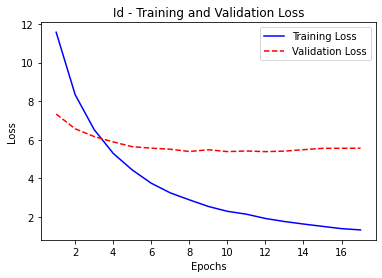

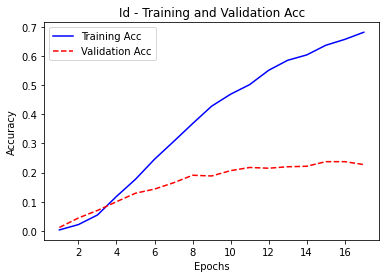

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

# 顯示訓練和驗證損失
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Id - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 顯示訓練和驗證準確度 注意 accyracy 要改成 acc，val_accuracy => val_acc，因為keras版本問題
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b-', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.title('Id - Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
from keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor='val_loss', mode='min',
                  verbose=1, patience=5)

from keras.callbacks import ModelCheckpoint
# 建立 ModelCheckpoint 物件
filename = './data/id_weights.h5'
mc = ModelCheckpoint(filename, monitor='val_accuracy',
                    mode='max', verbose=0,
                    save_best_only=True)

# 定義模型
model = Sequential()
model.add(GlobalAveragePooling2D(
         input_shape=train_features.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])
# 訓練模型
# validation_split：0~1之間的浮點數，用來指定訓練集的一定比例數據作為驗證集。
# validation_data：形式為（X，y）或（X，y，sample_weights）的tuple，是指定的驗證集。
history = model.fit(train_features, gender_label_train,
                    validation_data=(val_features, gender_label_val),
                    epochs=100, batch_size=32, verbose=0,
                    callbacks=[es, mc])
# 評估模型
print('\nTesting ...')
loss, accuracy = model.evaluate(test_features, gender_label_test, verbose=1)
print('測試資料集的準確度 = {:.2f}'.format(accuracy))

Epoch 17: early stopping

Testing ...
38/38 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7875
測試資料集的準確度 = 0.79


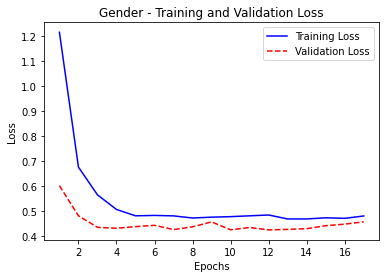

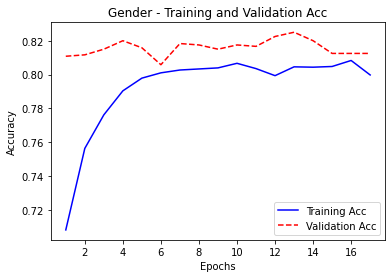

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# 顯示訓練和驗證損失
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Gender - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 顯示訓練和驗證準確度 注意 accyracy 要改成 acc，val_accuracy => val_acc，因為keras版本問題
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b-', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.title('Gender - Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
from keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor='val_loss', mode='min',
                  verbose=1, patience=5)

from keras.callbacks import ModelCheckpoint
# 建立 ModelCheckpoint 物件
filename = './data/lr_weights.h5'
mc = ModelCheckpoint(filename, monitor='val_accuracy',
                    mode='max', verbose=0,
                    save_best_only=True)

# 定義模型
model = Sequential()
model.add(GlobalAveragePooling2D(
         input_shape=train_features.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# 編譯模型
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])
# 訓練模型
# validation_split：0~1之間的浮點數，用來指定訓練集的一定比例數據作為驗證集。
# validation_data：形式為（X，y）或（X，y，sample_weights）的tuple，是指定的驗證集。
history = model.fit(train_features, lr_label_train,
                    validation_data=(val_features, lr_label_val),
                    epochs=100, batch_size=32, verbose=0,
                    callbacks=[es, mc])
# 評估模型
print('\nTesting ...')
loss, accuracy = model.evaluate(test_features, lr_label_test, verbose=1)
print('測試資料集的準確度 = {:.2f}'.format(accuracy))

Epoch 16: early stopping

Testing ...
38/38 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.7267
測試資料集的準確度 = 0.73


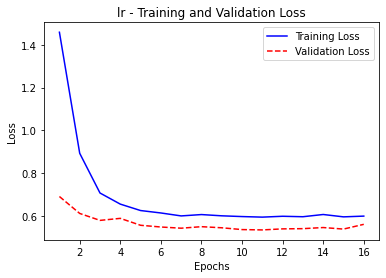

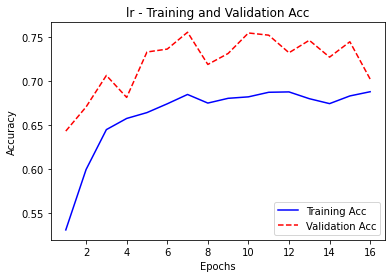

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# 顯示訓練和驗證損失
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('lr - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 顯示訓練和驗證準確度 注意 accyracy 要改成 acc，val_accuracy => val_acc，因為keras版本問題
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b-', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.title('lr - Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
from keras.callbacks import EarlyStopping
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor='val_loss', mode='min',
                  verbose=1, patience=5)

from keras.callbacks import ModelCheckpoint
# 建立 ModelCheckpoint 物件
filename = './data/id_weights.h5'
mc = ModelCheckpoint(filename, monitor='val_accuracy',
                    mode='max', verbose=0,
                    save_best_only=True)

# 定義模型
model = Sequential()
model.add(GlobalAveragePooling2D(
         input_shape=train_features.shape[1:]))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

# 編譯模型
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])
# 訓練模型
# validation_split：0~1之間的浮點數，用來指定訓練集的一定比例數據作為驗證集。
# validation_data：形式為（X，y）或（X，y，sample_weights）的tuple，是指定的驗證集。
history = model.fit(train_features, finger_label_train,
                    validation_data=(val_features, finger_label_val),
                    epochs=100, batch_size=32, verbose=0,
                    callbacks=[es, mc])
# 評估模型
print('\nTesting ...')
loss, accuracy = model.evaluate(test_features, finger_label_test, verbose=1)
print('測試資料集的準確度 = {:.2f}'.format(accuracy))

Epoch 22: early stopping

Testing ...
38/38 [==============================] - 0s 3ms/step - loss: 0.9924 - accuracy: 0.6133
測試資料集的準確度 = 0.61


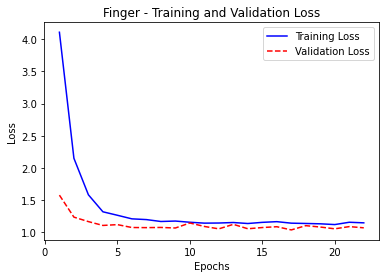

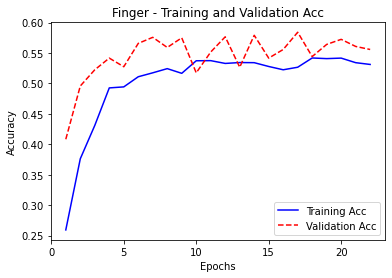

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# 顯示訓練和驗證損失
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r--', label='Validation Loss')
plt.title('Finger - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# 顯示訓練和驗證準確度 注意 accyracy 要改成 acc，val_accuracy => val_acc，因為keras版本問題
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1)
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b-', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.title('Finger - Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()